In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
input_path = "../data/raw_data/ Steinbrüche (250315).tif"

In [3]:
with rasterio.open(input_path) as src:
    print("Dateiformat:", src.driver)
    print("Breite x Höhe:", src.width, "x", src.height)
    print("Anzahl Bänder:", src.count)
    print("Koordinatensystem (CRS):", src.crs)
    print("Affine Transform:", src.transform)
    print("Daten-Typ (pro Band):", src.dtypes)
    print("Bounding Box:", src.bounds)

Dateiformat: GTiff
Breite x Höhe: 50910 x 24746
Anzahl Bänder: 4
Koordinatensystem (CRS): EPSG:4326
Affine Transform: | 0.00, 0.00, 11.84|
| 0.00,-0.00, 51.25|
| 0.00, 0.00, 1.00|
Daten-Typ (pro Band): ('uint8', 'uint8', 'uint8', 'uint8')
Bounding Box: BoundingBox(left=11.836958865460756, bottom=51.213277788493954, right=11.94108810085236, top=51.24506729299617)


In [4]:
# Für RGB: die ersten 3 Bänder laden (1=R, 2=G, 3=B)
with rasterio.open(input_path) as src:
    img = src.read([1, 2, 3]) 

In [5]:
# In matplotlib müssen die Achsen getauscht werden: (H, W, C)
img = np.transpose(img, (1, 2, 0))

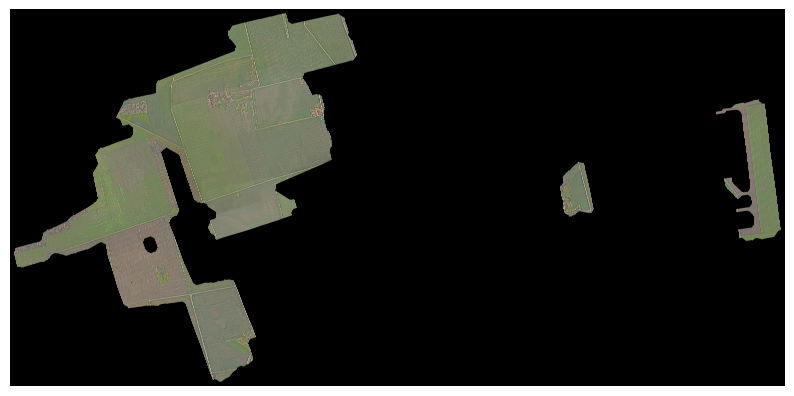

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()

In [7]:
output_path = "../data/preprocessed_data/01_map_crop_pixel.tif"

In [8]:
x_off = 20450
y_off = 3300
width = 2000
height = 2100

In [9]:
from rasterio.windows import Window

with rasterio.open(input_path) as src:
    window = Window(x_off, y_off, width, height)
    transform = src.window_transform(window)
    data = src.read(window=window)

    profile = src.profile
    profile.update({
        "height": height,
        "width": width,
        "transform": transform
    })

    with rasterio.open(output_path, "w", **profile) as dst:
        dst.write(data)

In [10]:
with rasterio.open(output_path) as src:
    img = src.read([1, 2, 3])  # shape: (3, height, width)

img = np.transpose(img, (1, 2, 0)) # ändern der Reihenfolge für plot

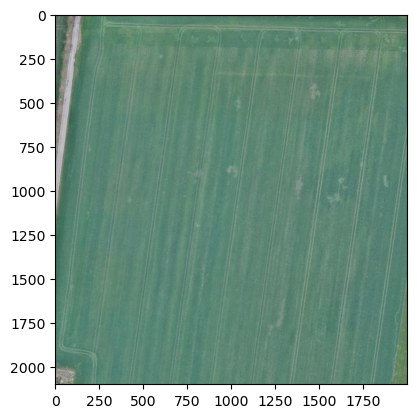

In [11]:
plt.imshow(img)
plt.show()